In [ ]:
!pip install -U -q PyDrive

In [ ]:
import sqlite3
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
!mkdir data

In [ ]:
file_id = '1KiOvhsdjJqaUCLJa5adZXEtQ_72s8Eb6'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data/checking-logs.sqlite')

In [ ]:
conn = sqlite3.connect('data/checking-logs.sqlite')

In [ ]:
views = pd.io.sql.read_sql(
    "select uid, datetime from pageviews where uid like 'user_%'",
    conn, parse_dates=['datetime']
    )

In [ ]:
views.head()

,uid,datetime
0,user_30,2020-04-17 22:46:26.785035
1,user_14,2020-04-18 10:53:52.623447
2,user_17,2020-04-18 10:56:55.833899
3,user_14,2020-04-18 10:57:37.331258
4,user_17,2020-04-18 12:05:48.200144


In [ ]:
commits = pd.io.sql.read_sql(
    "select uid, timestamp from checker where uid like 'user_%'",
    conn, parse_dates=['timestamp']
    )

In [ ]:
commits.head()

,uid,timestamp
0,user_4,2020-04-17 05:19:02.744528
1,user_4,2020-04-17 05:22:35.249331
2,user_4,2020-04-17 05:22:45.549397
3,user_4,2020-04-17 05:34:14.691200
4,user_4,2020-04-17 05:34:24.422370


In [ ]:
df_1 = views['datetime'].dt.floor('d').value_counts()
df_1 = df_1.rename_axis('date')
df_1 = df_1.reset_index(name='views')
df_1 = df_1.set_index('date')

In [ ]:
df_1.head()

,views
date,
2020-05-11,200
2020-05-14,187
2020-05-10,110
2020-05-13,102
2020-05-12,85


In [ ]:
df_2 = commits['timestamp'].dt.floor('d').value_counts()
df_2 = df_2.rename_axis('date')
df_2 = df_2.reset_index(name='commits')
df_2 = df_2.set_index('date')

In [ ]:
df_2.head()

,commits
date,
2020-05-14,575
2020-05-12,323
2020-04-26,261
2020-05-02,242
2020-05-13,211


In [ ]:
df = pd.concat([df_1, df_2], axis=1)
df = df.dropna()

In [ ]:
df.head()

,views,commits
date,,
2020-04-17,1.0,23.0
2020-04-18,23.0,69.0
2020-04-19,15.0,33.0
2020-04-21,3.0,25.0
2020-04-22,1.0,28.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2020-04-17 to 2020-05-21
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   views    32 non-null     float64
 1   commits  32 non-null     float64
dtypes: float64(2)
memory usage: 768.0 bytes


In [ ]:
df['views']

date
2020-04-17      1.0
2020-04-18     23.0
2020-04-19     15.0
2020-04-21      3.0
2020-04-22      1.0
2020-04-23      5.0
2020-04-25      1.0
2020-04-26      8.0
2020-04-28      2.0
2020-04-29      4.0
2020-04-30      9.0
2020-05-01      3.0
2020-05-02      6.0
2020-05-03     19.0
2020-05-04      1.0
2020-05-05      1.0
2020-05-06      3.0
2020-05-07      2.0
2020-05-08     48.0
2020-05-09     19.0
2020-05-10    110.0
2020-05-11    200.0
2020-05-12     85.0
2020-05-13    102.0
2020-05-14    187.0
2020-05-15     29.0
2020-05-16      4.0
2020-05-17      9.0
2020-05-18     51.0
2020-05-19     11.0
2020-05-20     12.0
2020-05-21     11.0
Name: views, dtype: float64

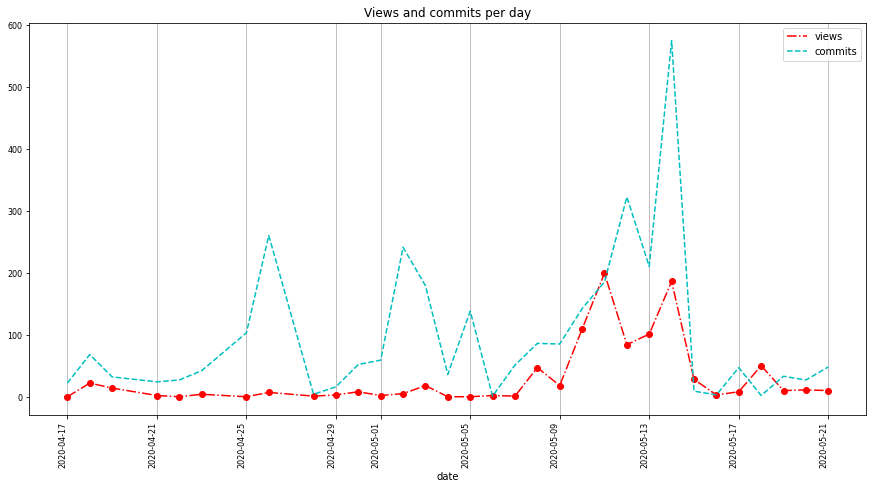

In [ ]:
ax = df.plot(figsize=(15, 8), title='Views and commits per day',
             color=['r', 'c'], style=['-.', '--'], rot=90, fontsize=8)
ax.get_lines()[0].set_marker('o')
ax.grid(axis='x')

Значение views 2 раза превышало 150.

In [ ]:
conn.close()